In [2]:
import numpy as np
import pandas as pd

dataset_file = 'income.csv'
df = pd.read_csv(dataset_file, index_col=0)

print("The dataset size is {}".format(df.shape))
df.head(5)

The dataset size is (7891, 10)


,Territorio,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,Abano Terme,0.0,3641.0,1997.0,4567.0,3268.0,413.0,400.0,177.0,347774542.0
1,Abbadia Cerreto,0.0,50.0,29.0,73.0,41.0,0.0,0.0,0.0,3399810.0
2,Abbadia Lariana,0.0,511.0,276.0,792.0,656.0,78.0,48.0,31.0,59153455.0
3,Abbadia San Salvatore,0.0,1303.0,783.0,1820.0,754.0,69.0,33.0,13.0,87615654.0
4,Abbasanta,0.0,577.0,194.0,443.0,430.0,26.0,13.0,0.0,30992769.0


In [3]:
df.describe()

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
count,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7.891000e+03
mean,0.436320,1503.934989,682.607528,1514.311367,1141.186668,112.176403,85.558738,39.987961,1.094664e+08
std,7.708889,8019.878927,3173.115435,6818.879697,7609.469415,1152.192290,978.254230,588.108958,7.821773e+08
min,0.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.388280e+05
25%,0.000000,226.000000,109.000000,207.000000,112.000000,7.000000,4.000000,0.000000,1.193600e+07
50%,0.000000,525.000000,253.000000,520.000000,309.000000,21.000000,14.000000,5.000000,3.099277e+07
75%,0.000000,1256.000000,600.000000,1347.000000,876.500000,68.000000,46.000000,20.000000,8.517508e+07
max,456.000000,540724.000000,205064.000000,413523.000000,520285.000000,78473.000000,66290.000000,35644.000000,5.130494e+10


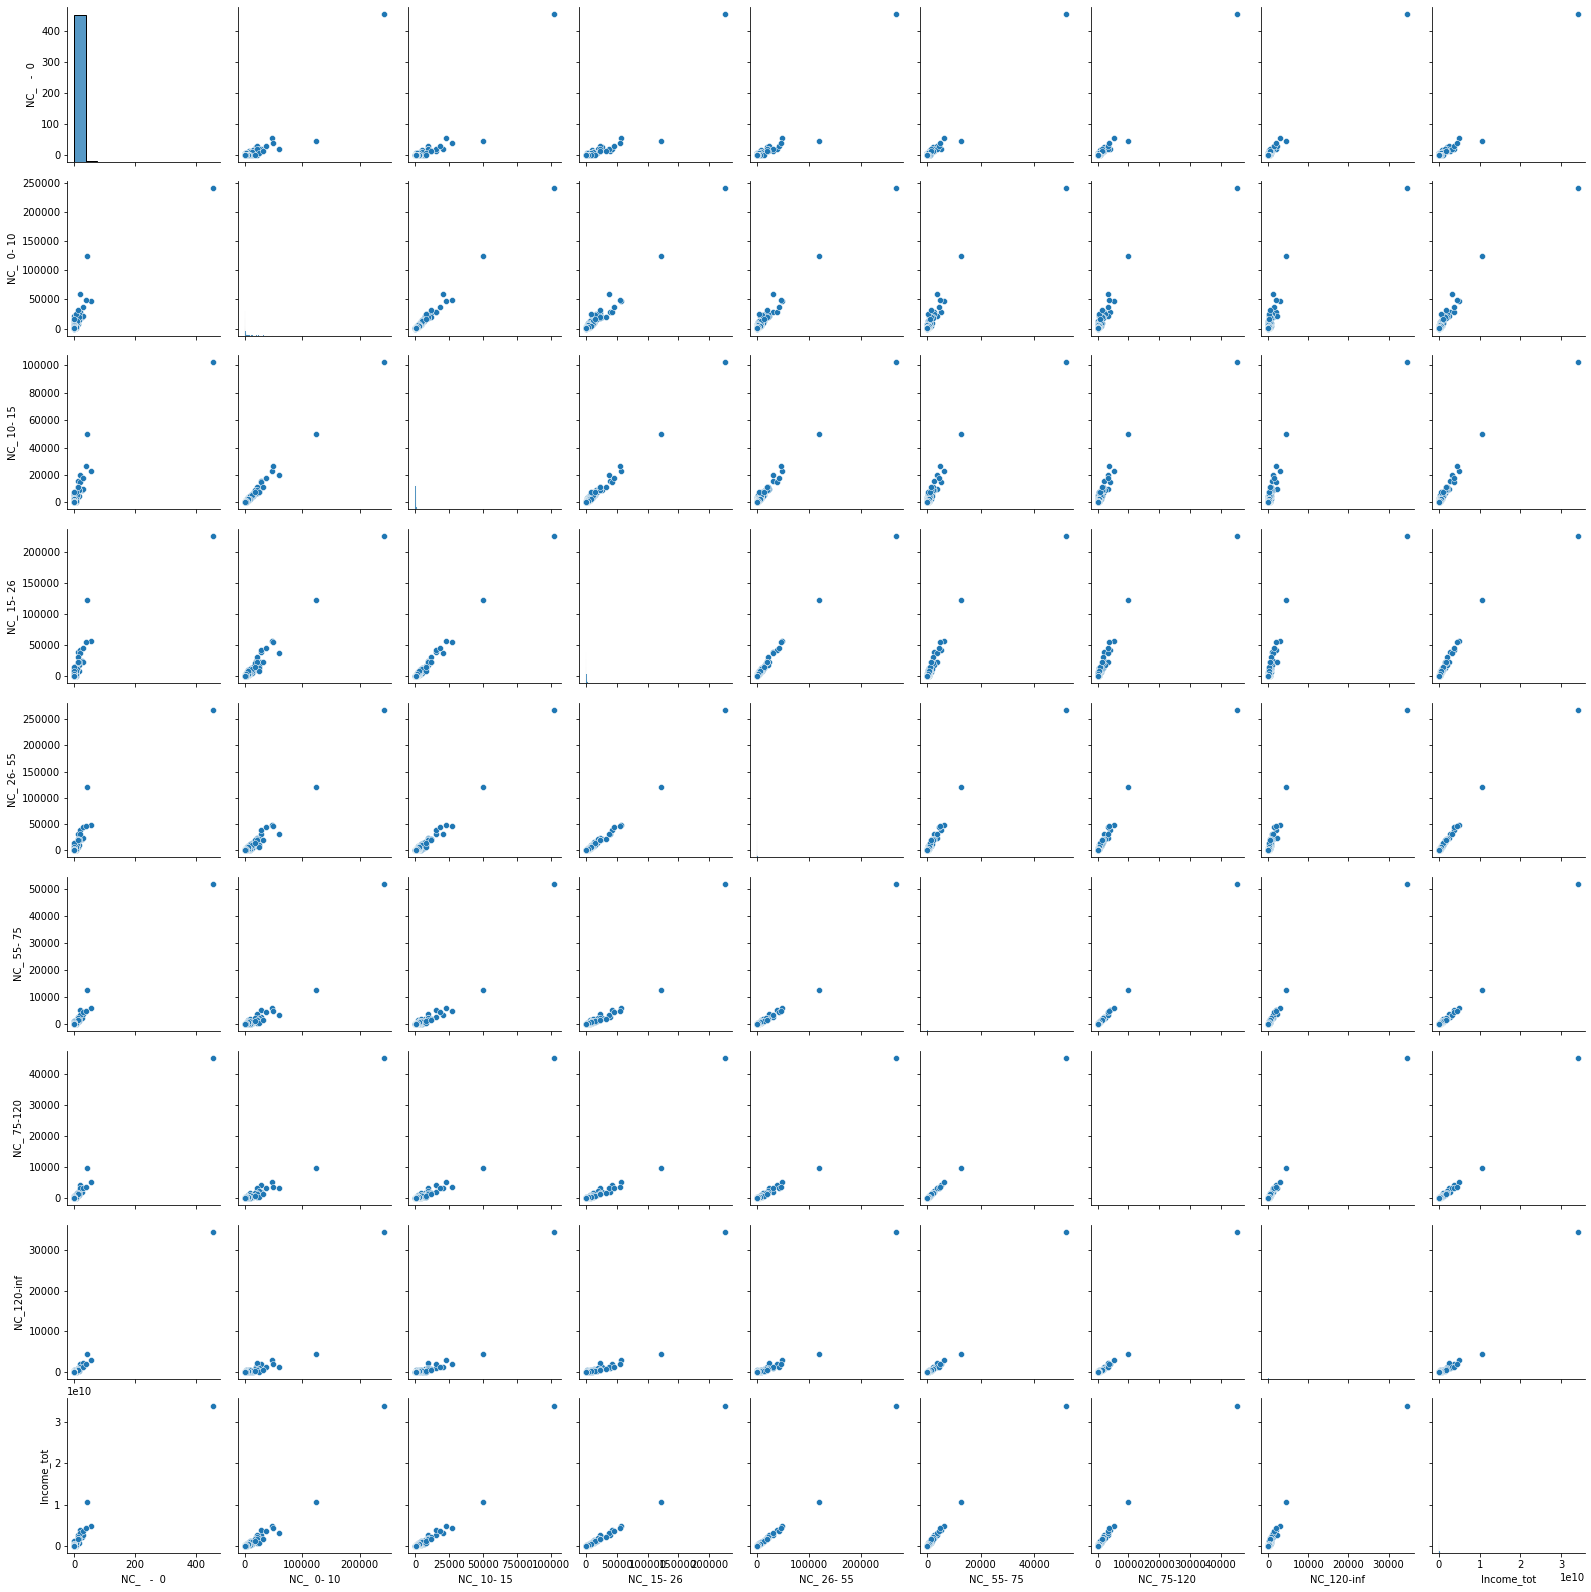

In [8]:
import seaborn as sns
sns.pairplot(df.sample(2000))

We cannot do anything meaningful here, without preprocessing the data first. The graphs show that the intervals of the data are too variable, and for that reason we need to apply MinMaxScaling.

In [5]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df0 = mms.fit_transform(df.drop(columns=['Territorio']))
df0 = pd.DataFrame(data=df0, columns=(df.drop(columns=['Territorio']).columns))
df0 = pd.concat([df0, df['Territorio']], axis=1)
df0

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot,Territorio
0,0.0,0.006724,0.009738,0.011032,0.006281,0.005263,0.006034,0.004966,0.006774,Abano Terme
1,0.0,0.000083,0.000141,0.000164,0.000079,0.000000,0.000000,0.000000,0.000062,Abbadia Cerreto
2,0.0,0.000936,0.001346,0.001903,0.001261,0.000994,0.000724,0.000870,0.001148,Abbadia Lariana
3,0.0,0.002401,0.003818,0.004389,0.001449,0.000879,0.000498,0.000365,0.001703,Abbadia San Salvatore
4,0.0,0.001058,0.000946,0.001059,0.000826,0.000331,0.000196,0.000000,0.000599,Abbasanta
...,...,...,...,...,...,...,...,...,...,...
7886,0.0,0.000224,0.000293,0.000382,0.000167,0.000076,0.000000,0.000112,0.000170,Zuglio
7887,0.0,0.000277,0.000507,0.000701,0.000290,0.000204,0.000196,0.000112,0.000305,Zumaglia
7888,0.0,0.001184,0.001351,0.000892,0.000361,0.000076,0.000075,0.000000,0.000406,Zumpano
7889,0.0,0.000638,0.000795,0.000322,0.000119,0.000051,0.000060,0.000000,0.000166,Zungoli


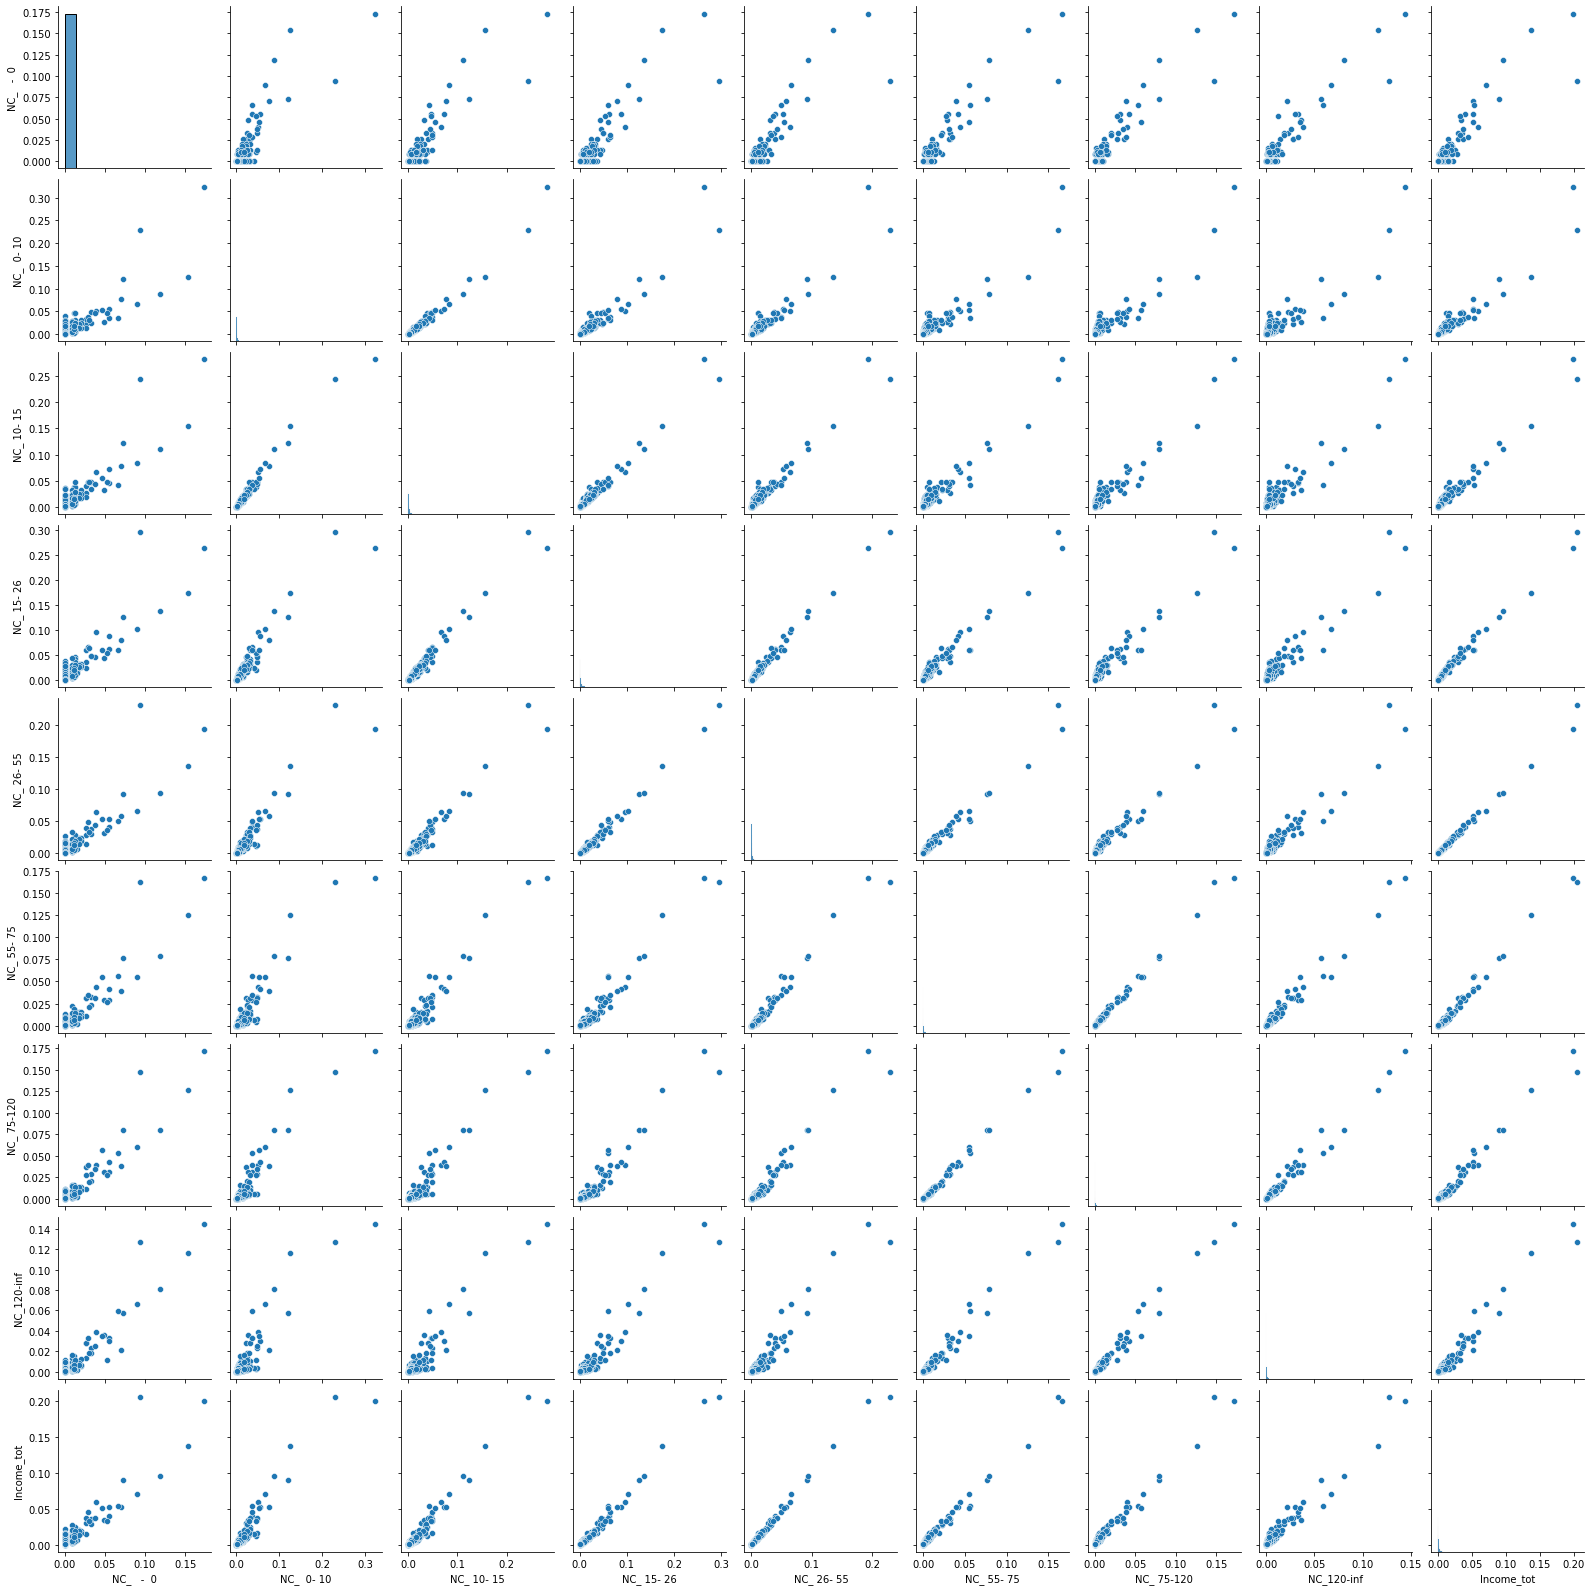

In [7]:
sns.pairplot(df0.sample(3000))

Fucking nothing changed =D. This whole exam is cursed. 


Im guessing that the professor wants us to drop the 'Territorio' column, since it has no significance whatsoever regarding the clustering: it is not-ordinal, discrete data.
For sure some kind of preprocessing has to be done though: the columns domains are too different from each other.  

In [10]:
df = df.drop(columns='Territorio')

We're going to find the best parameters for our clustering scheme, and use it on raw data.

In [19]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)


k_range = list(range(2,11)) # set the range of k values to test 
results = []

for k_ in k_range : 
    estimator = KMeans(n_clusters=k_)
    y_pred = estimator.fit_predict(df)
    results.append([k_, silhouette_score(df, y_pred), estimator.inertia_])

results = pd.DataFrame(data=results, columns=['n_clusters', 'sil_score', 'inertia'])
results

,n_clusters,sil_score,inertia
0,2,0.996463,1.200055e+21
1,3,0.979195,6.135969e+20
2,4,0.946537,3.723051e+20
3,5,0.946426,2.238576e+20
4,6,0.851175,1.375084e+20
5,7,0.851041,9.912301e+19
6,8,0.795197,6.626844e+19
7,9,0.741083,4.354537e+19
8,10,0.741239,3.360796e+19


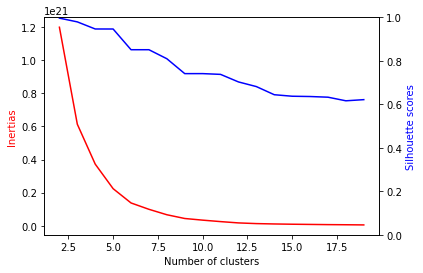

In [18]:
fig, ax = plt.subplots()
ax.plot(k_range, results['inertia'], color='red')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertias', color='red')

ax2 = ax.twinx()
ax2.plot(k_range, results['sil_score'], color='blue')
ax2.set_ylabel('Silhouette scores', color='blue')
ax2.set_ylim(0, 1)

plt.show()

Using the elbow mehod, we could 3 as the number of clusters. 

Let's return the cluster sizes as requested. 

In [30]:
k = 3
est = KMeans(n_clusters=k)
y_pred = est.fit_predict(df)
labels, counts = np.unique(y_pred, return_counts=True)
print(counts)
pd.DataFrame([counts], columns=labels)

[7875    2   14]


,0,1,2
0,7875,2,14


The clustering scheme is really bad bro, like, really really bad. We gotta try a new model for sure, this is ridiculous.  

In [31]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

k_range = list(range(2,11)) # set the range of k values to test 

parameters = [{'n_clusters': k_range
                    , 'linkage' : ['ward', 'complete', 'average', 'single']}]
pg = list(ParameterGrid(parameters))
result_ac = []

for i in range(len(pg)):
    ac = AgglomerativeClustering(**(pg[i]))
    y_ac = ac.fit_predict(df)
    result_ac.append([pg[i]['linkage'],pg[i]['n_clusters'],silhouette_score(df, y_ac)])


# Dataframe with the results
df_result_ac = pd.DataFrame(data = result_ac, columns=['linkage','n_clusters','silhouette_score'])
df_result_ac.sort_values(by='silhouette_score', ascending=False).head(5)

,linkage,n_clusters,silhouette_score
0,ward,2,0.996463
9,complete,2,0.996463
27,single,2,0.996463
18,average,2,0.996463
10,complete,3,0.995407


Fuck this is still bad. Help. I think we're just going to use KMeans at this point, idgaf.

In [34]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import make_pipeline

preprocessor = make_pipeline(
    StandardScaler(with_std=False),
    PowerTransformer(standardize=True),
)

new_df = preprocessor.fit_transform(df)
sns.pairplot(new_df.sample(2000))

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [33]:
k_range = list(range(2,11)) # set the range of k values to test 
new_results = []

for k_ in k_range : 
    estimator = KMeans(n_clusters=k_)
    y_pred = estimator.fit_predict(new_df)
    new_results.append([k_, silhouette_score(new_df, y_pred), estimator.inertia_])

new_results = pd.DataFrame(data=new_results, columns=['n_clusters', 'sil_score', 'inertia'])
new_results

,n_clusters,sil_score,inertia
0,2,0.614740,26195.109880
1,3,0.630450,16920.510579
2,4,0.536251,11246.623316
3,5,0.537760,9263.374592
4,6,0.463157,7466.482069
5,7,0.455436,6556.869599
6,8,0.422151,5704.408747
7,9,0.424364,5067.871881
8,10,0.400369,4615.766685


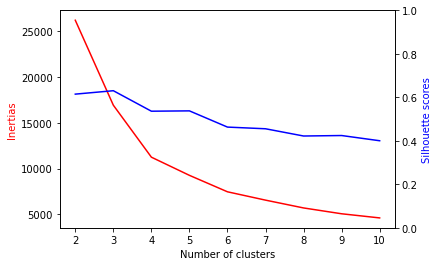

In [35]:
fig, ax = plt.subplots()
ax.plot(k_range, new_results['inertia'], color='red')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertias', color='red')

ax2 = ax.twinx()
ax2.plot(k_range, new_results['sil_score'], color='blue')
ax2.set_ylabel('Silhouette scores', color='blue')
ax2.set_ylim(0, 1)

plt.show()

While the silhoutte scores dropped, the inertias are waaaaay better thank god. I'd say that $k = 4$ is a better parameter now.  